**Assignment 1**

*Exploring data in Python*

For this assignment I have provided a portion of the data from the Ingenium Canada Museum Collection dataset. 

*I've cleaned it up abit!*

The assignment asks you to explore the data and provide some analysis and visualisations. It will mostly ask you to use approaches to data analysis and access that we have seen before, but also may involve doing a bit of further research into libraries like NumPy and MatplotLib.

**Complete your answers as a single Jupyter Notebook, highlighting which cell answers each question.**



**Question 1 [10]**

The data is on the GitHub page (will be made available at the start of the session Nov 12th), is called "museum_data_STEM_Assignment_1.tsv" and is in the "data" directory. 
It is a Tab Separated document.

Load in the data using NumPy. If you want to use Pandas, thats also fine but I am wary that not all students will have seen this yet (and it has not explicitly been taught on the course), as such, everything should be achievable with libraries we have used on this unit.

There is a header row at the top of the file which tells you all the column names. It will probably be useful to split this away into a separate array after you have loaded in the file.

In [1]:
#upload file into colab
'''from google.colab import files
uploaded = files.upload()'''
#or download it directly
!wget -O museum_data_STEM_assignment_fixed.tsv https://git.arts.ac.uk/raw/lmccallum/STEM-4-Creatives/master/data/museum_data_STEM_assignment_fixed.tsv?token=AAAAAH27YPJKEGQQP2VYO5LABGVQA --quiet

In [2]:
#Cell 1

#Importing useful libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#Load in the data using Pandas.

df = pd.read_csv("/content/museum_data_STEM_assignment_fixed.tsv",sep='\t', dtype = str,) 

# Defining Cols as a separate array 
# Implemented from https://www.w3schools.com/python/python_arrays.asp
cols = ['artifactNumber', 'ObjectName', 'BeginDate', 'group1', 'category1', 'material', 'Length', 'Width', 'Height', 'image']

df[cols].head()


    


,artifactNumber,ObjectName,BeginDate,group1,category1,material,Length,Width,Height,image
0,1966.0009.001,Propeller,1929,Transport,Aircraft parts,wood;metal,340.0 cm,30.0 cm,15.0 cm,http://source.techno-science.ca/artifacts-arte...
1,1966.0016.001,Propeller,Unknown,Transport,Aircraft parts,wood;metal,190.0 cm,15.0 cm,11.0 cm,http://source.techno-science.ca/artifacts-arte...
2,1966.0017.001,Propeller,Unknown,Transport,Aircraft parts,wood;metal,244.0 cm,25.0 cm,9.5 cm,http://source.techno-science.ca/artifacts-arte...
3,1966.0018.001,Propeller,1910,Transport,Aircraft parts,wood->ash;metal->brass;metal->tin,214.0 cm,22.0 cm,10.8 cm,http://source.techno-science.ca/artifacts-arte...
4,1966.0020.001,Propeller,1942,Transport,Aircraft parts,wood;metal,230.0 cm,25.0 cm,20.0 cm,http://source.techno-science.ca/artifacts-arte...


**Question 2 [40]**

Dimensions

Format the dimension data: Replace the dimensions columns (length, width, height) with floats. They are currently strings with cm prefixed on the end.

Display a picture for each of the longest, widest and tallest objects in your notebook.



In [3]:
#Cell 2

#I defined a nested for loop, to delete the unit of measurement inside the columns 'Length','Width','Height'. 

cols = ['Length','Width','Height']

#Implemented from https://www.w3schools.com/python/ref_func_str.asp and https://www.w3schools.com/python/python_for_loops.asp
delete = ['cm']
for col in cols:
    for cancel in delete:
        df[col] = df[col].str.replace(cancel,'') 
        #converted everything into float.
    df[col] = df[col].astype(float)


# Display a picture for each of the longest, widest and tallest objects in your notebook.
# Implemented from https://www.dataquest.io/blog/pandas-cheat-sheet/ and https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_index.html

longest_object=df.sort_values('Length',ascending=False).iloc[0,:]
widest_object=df.sort_values('Width',ascending=False).iloc[0,:]
tallest_object=df.sort_values('Height',ascending=False).iloc[0,:]
print (longest_object)
print (widest_object)
print (tallest_object)




artifactNumber                                        1982.0029.001
ObjectName                                                 Airplane
BeginDate                                                      1960
group1                                                    Transport
category1                                                  Aircraft
material                        metal->;glass->;resin->rubber;fibre
Length                                                         3730
Width                                                          4340
Height                                                         1120
image             http://source.techno-science.ca/artifacts-arte...
Name: 9257, dtype: object
artifactNumber                                        1982.0029.001
ObjectName                                                 Airplane
BeginDate                                                      1960
group1                                                    Transport
category1             

Assuming the volume of an object is l x w x h, plot a histogram of the volumes of the objects in the museum collection under 6000 cubic centimetres. Label the axes appropriately.

http://source.techno-science.ca/artifacts-artefacts/images/1982.0029.001.aa.cs.png
http://source.techno-science.ca/artifacts-artefacts/images/1982.0029.001.aa.cs.png
http://source.techno-science.ca/artifacts-artefacts/images/1968.0189.001.aa.cs.png


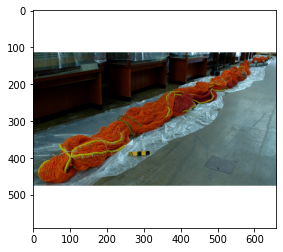

In [4]:
#Cell 3

#Find the link of the longest, tallest and widest object.


colus =['image']
for colu in colus:
 print (longest_object[colu])
 print (widest_object[colu])
 print (tallest_object[colu])

#Loaded the links and plotted images using imageio library.
#Aware that is possible to do the same directly with matplotlib, however I wanted to try another library.


'''
longest_object_print = plt.imread("http://source.techno-science.ca/artifacts-artefacts/images/1966.0984.001.aa.cs.png")
plt.imshow(longest_object_print)
plt.show()'''



#Implemented from https://imageio.readthedocs.io/en/stable/examples.html 
from imageio import imread
longest_object_print = imread('http://source.techno-science.ca/artifacts-artefacts/images/1966.0984.001.aa.cs.png')
widest_object_print = imread('http://source.techno-science.ca/artifacts-artefacts/images/1970.0391.001.aa.cs.png')
tallest_object_print = imread('http://source.techno-science.ca/artifacts-artefacts/images/1972.0788.001.aa.cs.png')

plt.imshow(longest_object_print)


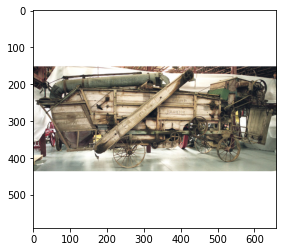

In [5]:
#Cell 4 (widest object)

plt.imshow(widest_object_print)


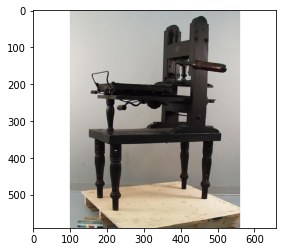

In [6]:
#Cell 5 (tallest object)
plt.imshow(tallest_object_print)

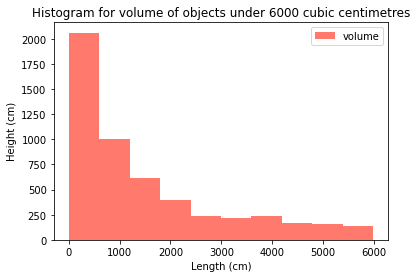

In [7]:
#Cell 6 
#Assuming the volume of an object is l x w x h, plot a histogram of the volumes of the objects in the museum collection under 6000 cubic centimetres. Label the axes appropriately.

#Calcolating volume

df['volume']=df['Width']*df['Height']*df['Length']
df=df[df.volume<6000]

#plotting
#For color plotting https://www.w3schools.com/colors/colors_xkcd.asp

plt.hist(df['volume'], color = 'xkcd:salmon', lw=0, label='volume')
import scipy.stats as st
plt.legend(loc="upper left")
plt.title("Histogram for volume of objects under 6000 cubic centimetres");
plt.xlabel("Length (cm)")
plt.ylabel("Height (cm)")
plt.legend()


**Question 3 [50]**

Dates

Filter the collection so you have only items that have known dates. List comprehensions may be useful here. Use this to find out what is the oldest object?

Plot date of object against volume from everything added to the collection since 1850. Pick sensible ticks and labels for the axes, as well as a sensible scale.
Each item on the plot should have a different colour or symbol depending on its category as described by the group1 heading . EXTRA BONUS If you can put in a legend mapping category to colour
Write a paragraph describing what the plot tells us about the museums collection in relation to time, size and category. You can add some extra plots if you think it will help support any of your points.

In [8]:
#Cell 7 

#Filter the collection so you have only items that have known dates, so I excluded the 'Unknown' values.

df = df[df.BeginDate!='Unknown']

#found oldest object with sort_values (did the same as cell2 (2nd part))

oldest_object = df.sort_values('BeginDate',ascending=True).iloc[0,:]
print(oldest_object)



artifactNumber                                        1980.0657.001
ObjectName                                             "Bob, plumb"
BeginDate                                                      1101
group1                                                       Nature
category1                                          Survey equipment
material                                              metal->bronze
Length                                                          8.1
Width                                                           2.1
Height                                                          2.1
image             http://source.techno-science.ca/artifacts-arte...
volume                                                       35.721
Name: 7757, dtype: object


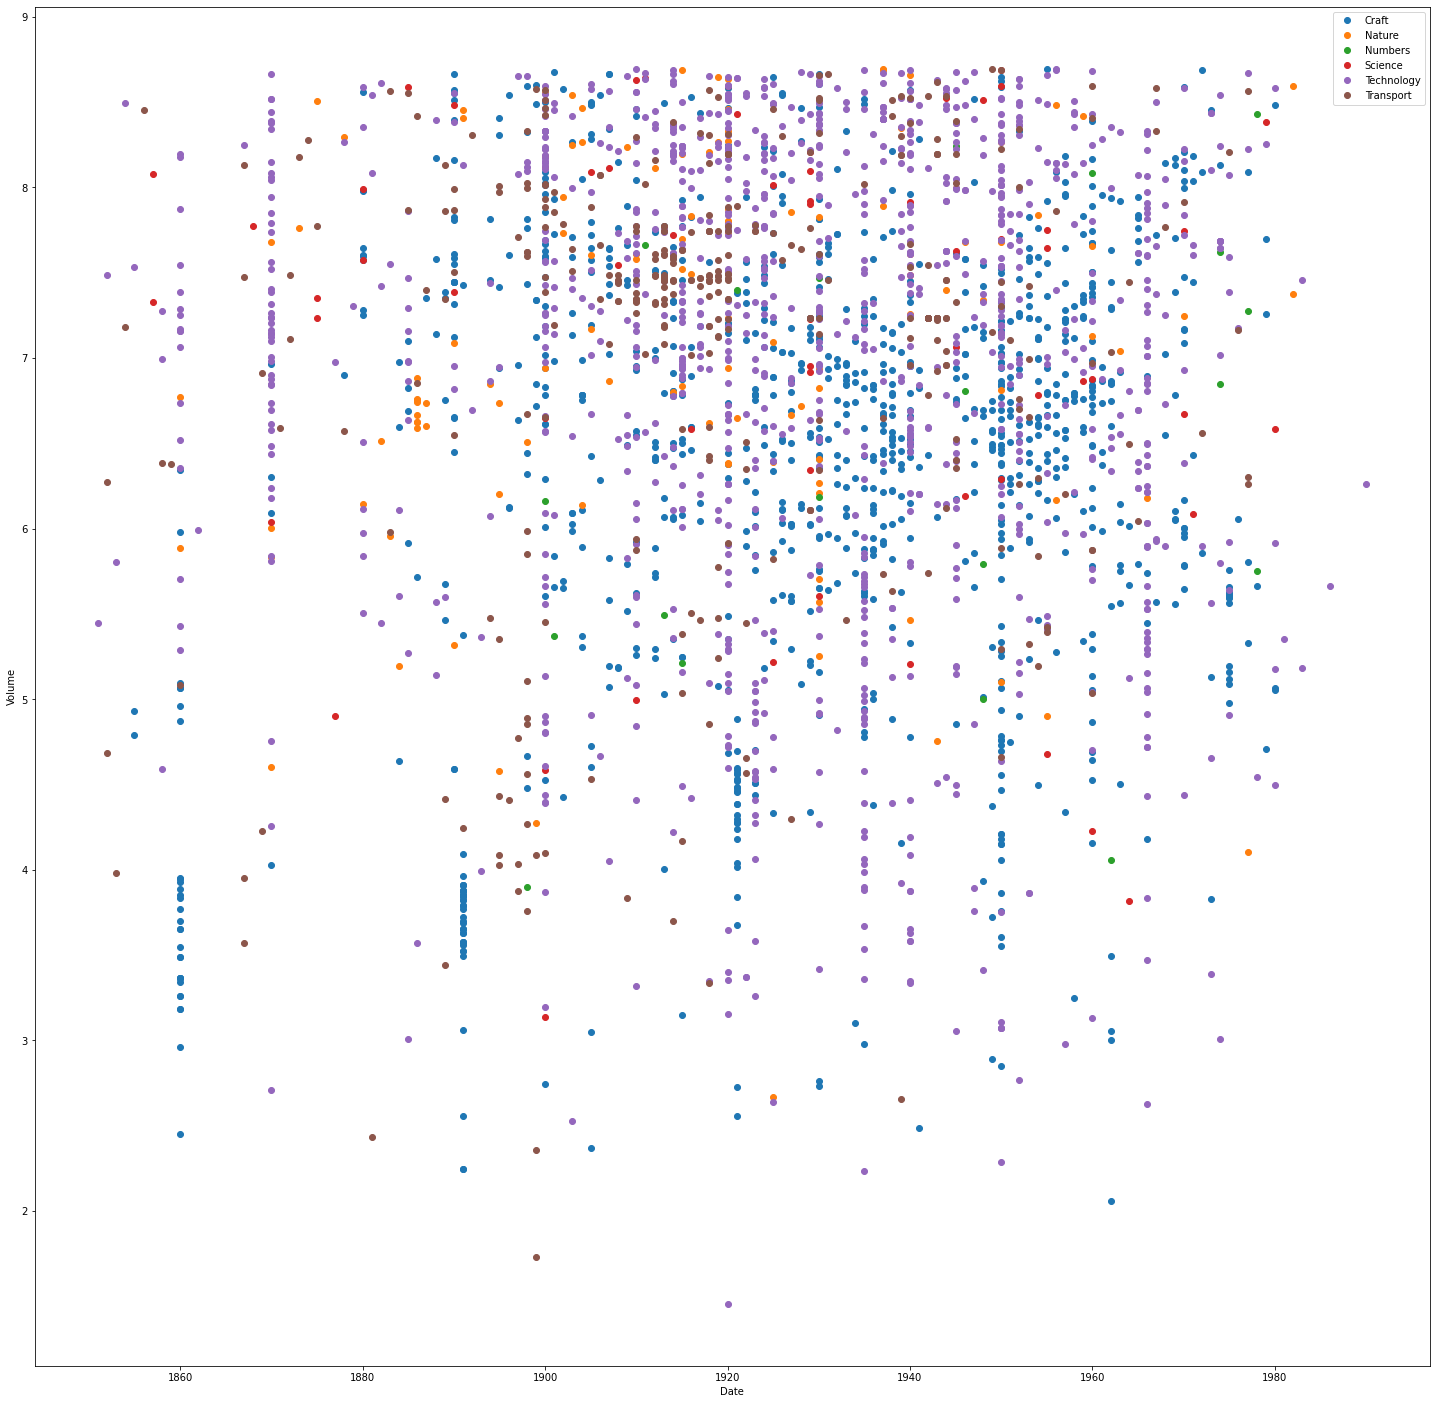

In [9]:
#Cell 8
#Plot date of object against volume from everything added to the collection since 1850. Pick sensible ticks and labels for the axes, as well as a sensible scale.
df.sort_values('BeginDate',inplace=True,ascending=True)
#implemented from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html
df['BeginDate']=df['BeginDate'].astype(int)
df = df[df.BeginDate>1850]

#Used natural logarithm as a scale here
#Implemented from https://www.geeksforgeeks.org/numpy-log-python/
df['volume_log'] = np.log(df['volume'])

plt.rcParams["figure.figsize"] = (25,25)
plt.xlabel("Date")
plt.ylabel("Volume")


#Each item on the plot should have a different colour or symbol depending on its category as described by the group1 heading 
#Implemented from https://realpython.com/pandas-groupby/

groups = df.groupby("group1")
for name, group in groups:
    plt.plot(group["BeginDate"], group["volume_log"], marker="o", linestyle="",  label=name)
    
plt.legend()




**Write a paragraph describing what the plot tells us about the museums collection in relation to time, size and category. You can add some extra plots if you think it will help support any of your points.**

This scatter plot does not show a relation between Date and Volume.
It means that artworks tend to have a homogeneous trend.
Most of the artworks are divided between Craft, Transport, Nature and Technology categories. Numbers and Science are the categories with fewer artworks. Science generally has bigger items than Numbers.
At the beginning of the graph (1850-1900), we have a considerable amount of small Craft items, and Transport artworks increment between 1900-1960. Technology items are always at the top of the graph for Volume and quantity. Craft seems to share the same trend, but it never reaches Technology average Volume.


Bibliography

W3schools.com. 2021. Python Arrays. [online] Available at: <https://www.w3schools.com/python/python_arrays.asp> [Accessed 14 January 2021].
W3schools.com. 2021. Python Str() Function. [online] Available at: <https://www.w3schools.com/python/ref_func_str.asp> [Accessed 14 January 2021].
W3schools.com. 2021. Python For Loops. [online] Available at: <https://www.w3schools.com/python/python_for_loops.asp> [Accessed 14 January 2021].
Devlin, J., 2020. Pandas Cheat Sheet — Python For Data Science – Dataquest. [online] Dataquest. Available at: <https://www.dataquest.io/blog/pandas-cheat-sheet/> [Accessed 14 January 2021].
Pandas.pydata.org. 2021. Pandas.Dataframe.Sort_Index — Pandas 1.2.0 Documentation. [online] Available at: <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_index.html> [Accessed 14 January 2021].
Imageio.readthedocs.io. 2021. Imageio Usage Examples — Imageio 2.9.0 Documentation. [online] Available at: <https://imageio.readthedocs.io/en/stable/examples.html> [Accessed 14 January 2021].
W3schools.com. 2021. Colors - XKCD. [online] Available at: <https://www.w3schools.com/colors/colors_xkcd.asp> [Accessed 14 January 2021].
Pandas.pydata.org. 2021. Pandas.Dataframe.Astype — Pandas 1.2.0 Documentation. [online] Available at: <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html> [Accessed 14 January 2021].
GeeksforGeeks. 2021. Numpy.Log() In Python - Geeksforgeeks. [online] Available at: <https://www.geeksforgeeks.org/numpy-log-python/> [Accessed 14 January 2021].
Solomon, B., n.d. Pandas Groupby: Your Guide To Grouping Data In Python – Real Python. [online] Realpython.com. Available at: <https://realpython.com/pandas-groupby/> [Accessed 14 January 2021].